In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split

In [8]:
abo_path = 'D:/Users/masoodw/ML_FINANCE/asigmo/github/asigmo/data/titanic/train.csv'
p_df_raw_train = pd.read_csv(abo_path, sep=',', encoding="UTF-8")

In [9]:
p_df_raw_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
p_df_raw_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
p_df_raw_train.Age = p_df_raw_train.Age.fillna(-1)
p_df_raw_train.Cabin = p_df_raw_train.Cabin.fillna('NA')
p_df_raw_train.Embarked = p_df_raw_train.Embarked.fillna('NA')

## Check class frequencies

In [12]:
y = p_df_raw_train.Survived
sum(y), sum(y)/len(y)*100

(342, 38.38383838383838)

### Preprocessing

In [27]:
df_y = p_df_raw_train['Survived']
#df_X_raw = p_df_raw_train.drop(['Name'], axis=1)
df_X_raw = p_df_raw_train.drop(['Name', 'Survived'], axis=1)

columns=df_X_raw.columns
for f in df_X_raw.columns:
    if df_X_raw[f].dtype == 'object':
        df_X_raw[f] = LabelEncoder().fit_transform(list(df_X_raw[f]))        

In [28]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_X_raw)
df_X = pd.DataFrame(scaled_df, columns=columns)

In [54]:
class_labels = np.unique(y)
class_weights = compute_class_weight('balanced', class_labels, y)
class_weights = dict(zip(class_labels, class_weights))

In [40]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y)

### Default parameters

In [52]:
penalty='l2', ### 'elastic'
dual=False,
tol=0.0001,
C=1.0,
fit_intercept=True,
intercept_scaling=1,
class_weight=None,
random_state=None,
solver='lbfgs',
max_iter=100,
multi_class='auto',
verbose=0,
warm_start=False,
n_jobs=None,
l1_ratio=None

In [42]:
clf = LogisticRegression(random_state=0, class_weight=class_weights)

In [43]:
clf.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.8114754098360656, 1: 1.3026315789473684},
                   random_state=0)

In [44]:
clf_train_pred = clf.predict(X_train)

In [46]:
auc_train = roc_auc_score(y_train, clf_train_pred)
print('\nAUROC.....', auc_train)


AUROC..... 0.7749190254893678


In [48]:
fpr, tpr, threshold = roc_curve(y_train, clf_train_pred)

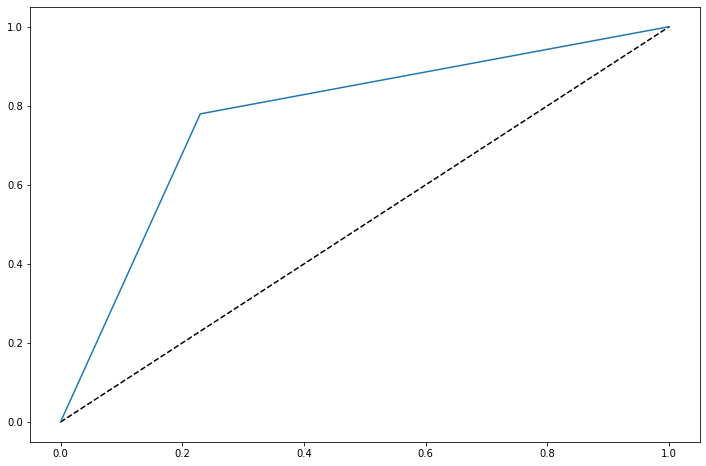

In [49]:
fig = plt.figure(figsize=(12,8)) 
ax = fig.add_subplot(1,1,1)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr)

In [51]:
print('Accuracy')
print(accuracy_score(y_train, clf_train_pred))
print('Confusion Matrix')
print(confusion_matrix(y_train, clf_train_pred))
print('Confusion Report')
print(classification_report(y_train, clf_train_pred))

Accuracy
0.7739520958083832
Confusion Matrix
[[312  93]
 [ 58 205]]
Confusion Report
              precision    recall  f1-score   support

           0       0.84      0.77      0.81       405
           1       0.69      0.78      0.73       263

    accuracy                           0.77       668
   macro avg       0.77      0.77      0.77       668
weighted avg       0.78      0.77      0.78       668



### Rpeat the above stats for test data

### saving/loading the model

In [ ]:
joblib.dump(clf, 'logistic_regression.pkl')

In [ ]:
clf_pickle = joblib.load('logistic_regression.pkl')